<a href="https://colab.research.google.com/github/VedantMPatil10/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear Regression Project**

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
customers= pd.read_csv('/content/Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [29]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [30]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# **Data Analysis**

In [31]:
sns.set_style('whitegrid')

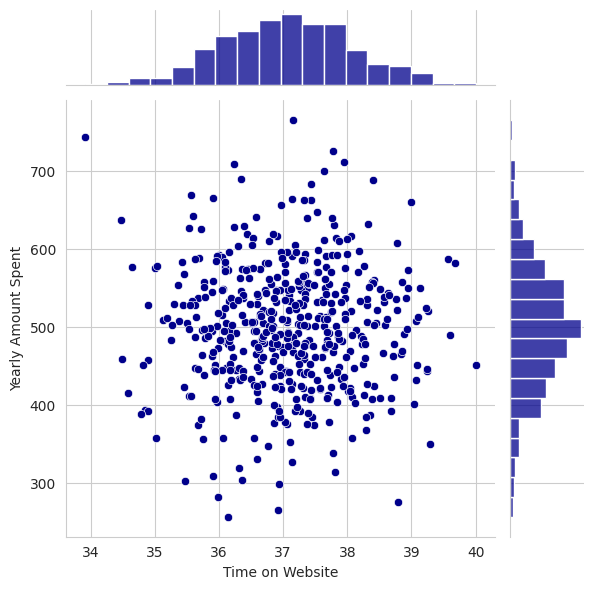

In [35]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent',color='darkblue')

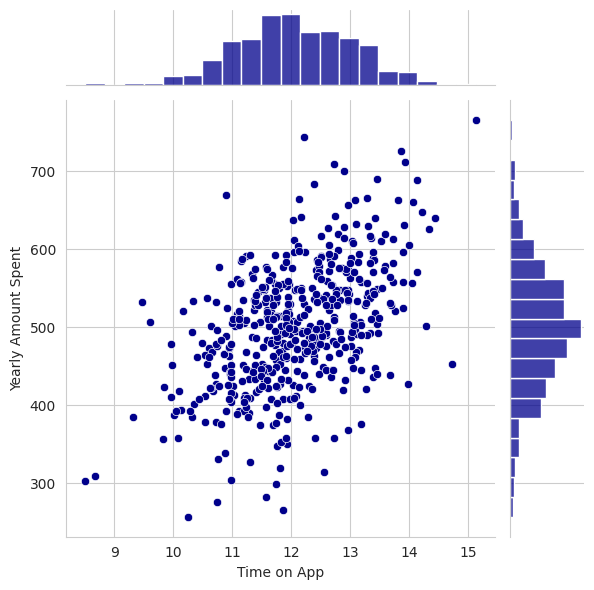

In [36]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent',color='darkblue')



*   There seems to be a clearer upwards trend regarding More Time Spent On App == Higher Yearly Spending.

*   Whereas for Time Spent On Website there is no clear trend and the plot is more scattered.

*  This suggests that the App might be a better option for engaging users and encouraging them to spend more.



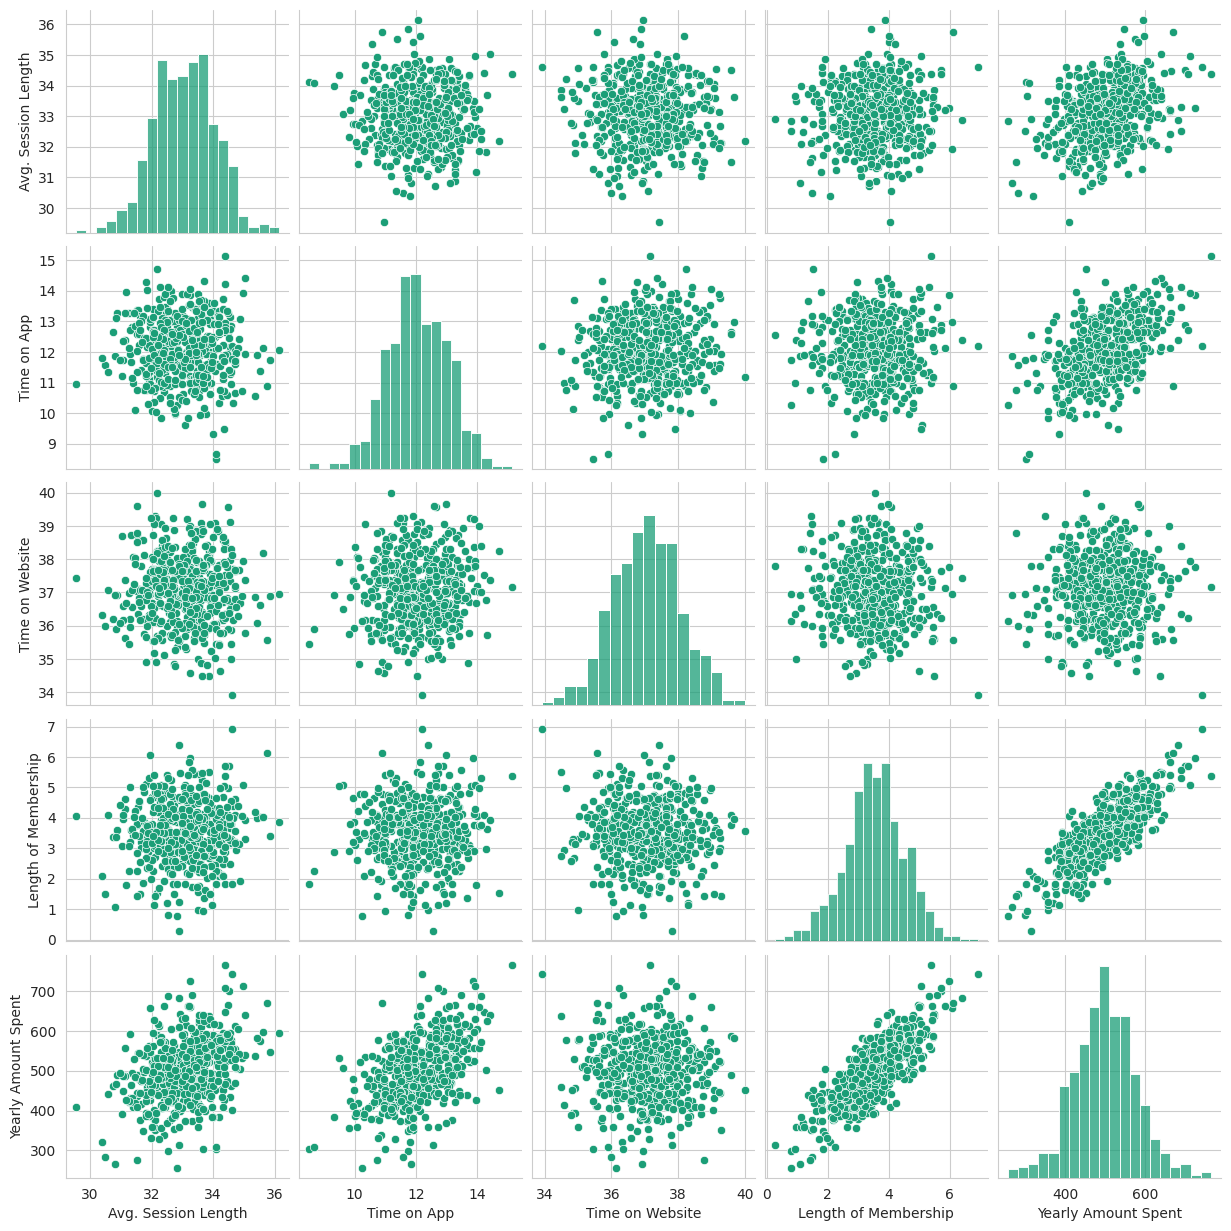

In [49]:
sns.set_palette('Dark2')
sns.pairplot(customers)



*   There is a clear and positive trend between the Length Of A Membership and the Yearly Amount Spent.
*  This makes sense, as the longer someone has been a member, the more likely they are to spend more money.
*   Other features dont show any clear trend with Spending or with each other.






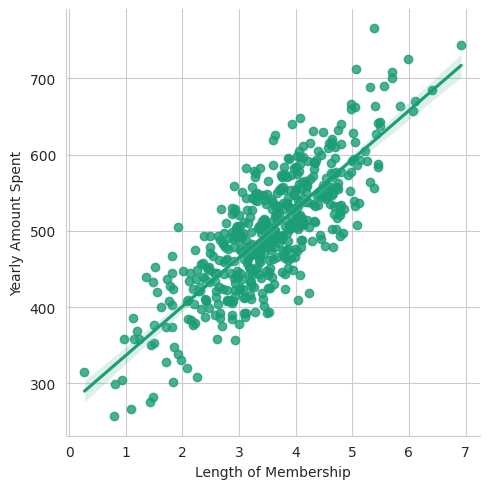

In [53]:
sns.lmplot(data=customers,x='Length of Membership',y='Yearly Amount Spent')

# **Creating and Training Model**

In [58]:
from sklearn.model_selection import train_test_split

X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=67)

In [62]:
from sklearn.linear_model import LinearRegression

limodel= LinearRegression()
limodel.fit(X_train,y_train)

print('Coefficients:',limodel.coef_)

Coefficients: [25.43285927 38.69008955  0.50247594 61.52728108]


According to the coefficients:

- Keeping all other features fixed, a 1 unit increase in **Avg Session Length** is equal to an **increase of 25.43 total dollars spent**.
- Keeping all other features fixed, a 1 unit increase in **Time on App** is equal to an **increase of 38.69 total dollars spent**.
- Keeping all other features fixed, a 1 unit increase in **Time on Website** is equal to an **increase of 0.50 total dollars spent**.
- Keeping all other features fixed, a 1 unit increase in **Length of Membership** is equal to an **increase of 61.52 total dollars spent**.

# **Prediction and Evaluation**

Text(0, 0.5, 'Predicted Y')

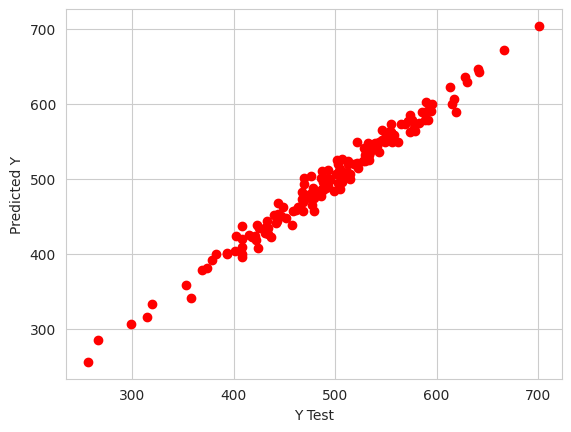

In [70]:
predictions= limodel.predict(X_test)

plt.scatter(y_test,predictions).set_color('r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [71]:
from sklearn import metrics

print('MeanAbsolute_error:', metrics.mean_absolute_error(y_test, predictions))
print('MeanSquared_error:', metrics.mean_squared_error(y_test, predictions))
print('RootMeanSquared_error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MeanAbsolute_error: 8.642634843788864
MeanSquared_error: 123.26378032478972
RootMeanSquared_error: 11.102422272855133


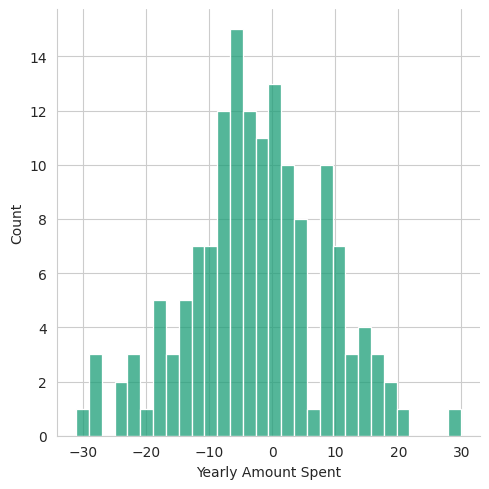

In [76]:
#Checking residuals
sns.displot(y_test-predictions,bins=30)

# **Conclusion**

There are 2 ways to go about this:

1.   Develop the Website to catch up to the performance of the mobile app.
2.   Develop the mobile app more since its working better.

This very much depends on the other factors going on at the company.